In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
import json
import glob
from harris_helper import *

#### Fetch all files

In [3]:
!ls ../../data/all-frames-colour

Grove3	RubberWhale  Urban2


In [4]:
with open("sobel_choices.json",'r') as fd:
    sobel_dict=json.load(fd)
for curr_key in sobel_dict:
    for key2 in sobel_dict[curr_key]:
        sobel_dict[curr_key][key2]=np.array(sobel_dict[curr_key][key2])

In [5]:
IMG_IDX=2

In [6]:
def fetch_all_images(colored=False):
    path_to_main_folders="../../data/all-frames-colour"
    main_folders=glob.glob(path_to_main_folders+"/*")
    image_arr=[]
    for curr_elem in main_folders:
        files=glob.glob(curr_elem+"/*png")
        #print(*files,sep='\n')
        img_to_read=files[0]
        image = cv2.imread(img_to_read)
        # convert the input image into
        # grayscale color space
        print(files[0])
        if colored==False:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image_arr.append(image)
    return image_arr

In [7]:
all_images=fetch_all_images()

../../data/all-frames-colour/Urban2/frame11.png
../../data/all-frames-colour/RubberWhale/frame11.png
../../data/all-frames-colour/Grove3/frame11.png


In [8]:
main_image=all_images[IMG_IDX]

In [9]:
main_image.shape

(480, 640)

### Original image

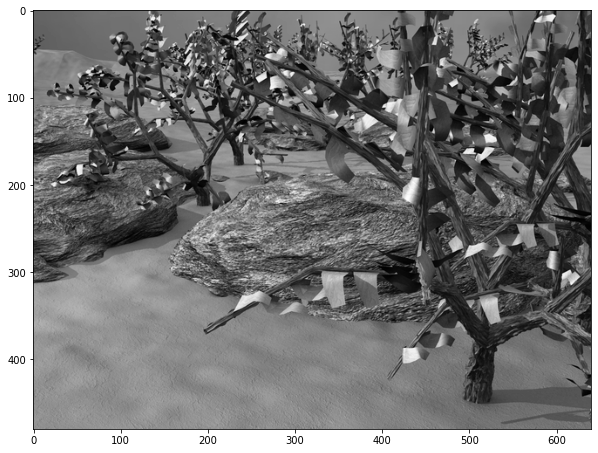

In [10]:
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(main_image,cmap='gray')


# Experiments were performed by varying parameters in this notebook

## Algo can be chosen by changing the "algo" parameter

### K_val=0.1, large window size for aggregation

In [11]:
harris_mat=find_corners(main_image, 
                        sobel_dict['3x3']['x'], 
                        sobel_dict['3x3']['y'],
                        do_gaussian=True,
                        algo="harris",
                        sigma_val=1,
                        k_val=0.1, 
                        window_size_for_aggregating=5,
                        window_size_for_suppression=11
                       )

window for suppression is  11
Shape is  (480, 640)
Convolving done
Applying gaussian
Gaussian done
Harris value found
Suppression done


../../data/all-frames-colour/Urban2/frame11.png
../../data/all-frames-colour/RubberWhale/frame11.png
../../data/all-frames-colour/Grove3/frame11.png


(-0.5, 639.5, 479.5, -0.5)

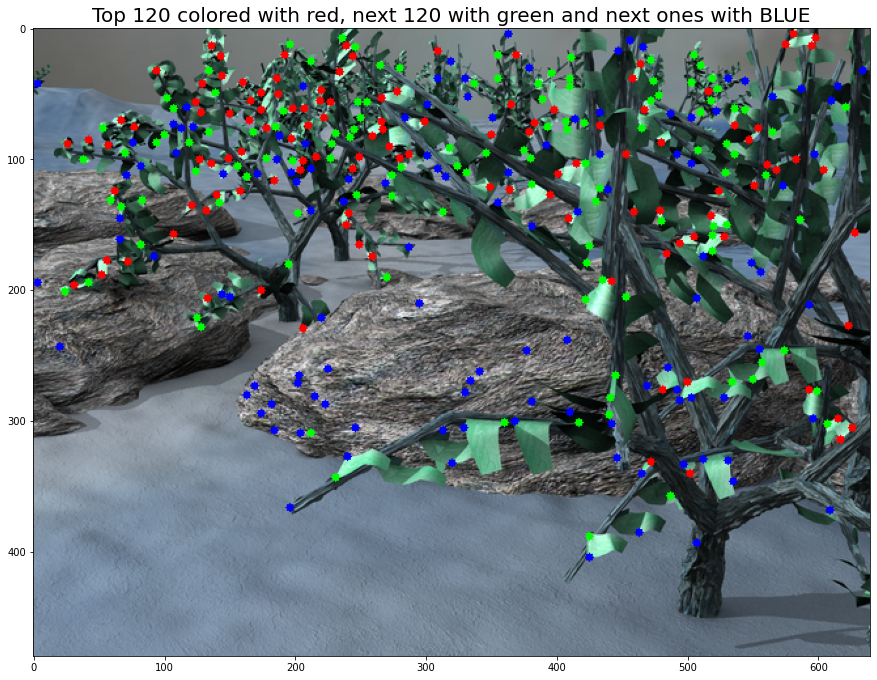

In [12]:

fig = plt.figure(figsize=(15,15))


GAPS_USED=120
new_image=fetch_annotated_image(fetch_all_images(True)[IMG_IDX], harris_mat, GAPS_USED)
ax = fig.add_subplot(1,1,1)
ax.imshow(new_image)
ax.set_title(f"Top {GAPS_USED} colored with red, next {GAPS_USED} with green and next ones with BLUE",fontdict={'fontsize': 20})
ax.axis('on')


    


../../data/all-frames-colour/Urban2/frame11.png
../../data/all-frames-colour/RubberWhale/frame11.png
../../data/all-frames-colour/Grove3/frame11.png
[[], [], [], [], []]
len for (255, 0, 0) is 4
len for (255, 197, 0) is 10
len for (255, 212, 0) is 29
len for (255, 255, 0) is 133
len for (231, 233, 185) is 137


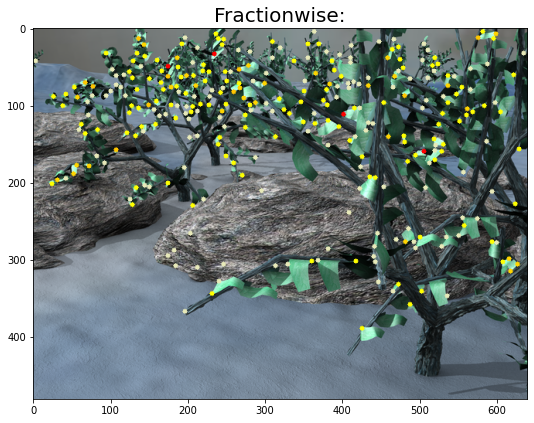

In [13]:
fig = plt.figure(figsize=(15,15))

new_image=fetch_annotated_image_fraction(fetch_all_images(True)[IMG_IDX], harris_mat)
ax = fig.add_subplot(2,1,2)
ax.imshow(new_image)
ax.set_title(f"Fractionwise:",fontdict={'fontsize': 20})
ax.axis('on')
plt.show()